In [1]:
# !pip install spacy -qq
# !python -m spacy download en_core_web_md

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# import spacy
# import en_core_web_md

In [3]:
# nlp = en_core_web_md.load()

In [2]:
df = pd.read_csv("moneyWorks4me_Reliance_history.csv")

In [3]:
df.head()

,link,title,date,news_text
0,https://www.moneyworks4me.com/company/news/ind...,Reliance Industries’ step down arm inks agreem...,"05 Aug, 2022",Reliance Industries' step down arm -- Reliance...
1,https://www.moneyworks4me.com/company/news/ind...,Reliance Industries secures 104th position in ...,"04 Aug, 2022",Reliance Industries (RIL) has jumped 51 places...
2,https://www.moneyworks4me.com/company/news/ind...,Reliance Industries gains as its arm gets CCI ...,"03 Aug, 2022",Reliance Industries is currently trading at Rs...
3,https://www.moneyworks4me.com/company/news/ind...,CCI approves stake buy in SCIPL by Reliance In...,"03 Aug, 2022",The Competition Commission of India (CCI) has ...
4,https://www.moneyworks4me.com/company/news/ind...,Reliance Industries rises as its arm acquires ...,"02 Aug, 2022",Reliance Industries is currently trading at Rs...


In [4]:
sentAnalyzer = SentimentIntensityAnalyzer()

In [5]:
len(sentAnalyzer.lexicon)

7506

In [6]:
df['title_senti_comp'] = df['title'].apply(lambda x : sentAnalyzer.polarity_scores(x)['compound'])

In [7]:
df['news_senti_comp'] = df['news_text'].apply(lambda x : sentAnalyzer.polarity_scores(x)['compound'])

In [8]:
df['avg_senti_comp'] = round((df['title_senti_comp'] + df['news_senti_comp'])/2,2)

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
# no of sentiments 
df.describe()

,title_senti_comp,news_senti_comp,avg_senti_comp
count,1100.000000,1100.000000,1100.000000
mean,0.090845,0.593760,0.342264
std,0.219720,0.376567,0.250178
min,-0.709600,-0.965200,-0.840000
25%,0.000000,0.361200,0.210000
50%,0.000000,0.709600,0.380000
75%,0.177900,0.891000,0.480000
max,0.880700,0.996000,0.930000


In [11]:
df.corr()

,title_senti_comp,news_senti_comp,avg_senti_comp
title_senti_comp,1.000000,0.362919,0.712338
news_senti_comp,0.362919,1.000000,0.912427
avg_senti_comp,0.712338,0.912427,1.000000


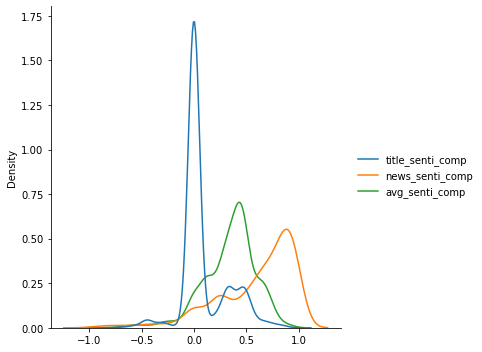

In [12]:
sns.displot(data=df,kind="kde")

In [13]:
df_date_grp = df.groupby([df.date.dt.year, df.date.dt.month]).mean()

In [14]:
df_date_grp.index.rename(['year','month'],inplace=True)

In [15]:
df_date_grp.head()

title_senti_comp  news_senti_comp  avg_senti_comp
year month                                                   
2016 8             -0.065543         0.583400        0.260000
     9              0.018391         0.063309        0.040000
     10             0.018391         0.548845        0.283636
     11            -0.012144         0.497922        0.244444
     12             0.141767         0.820900        0.481667

<AxesSubplot:xlabel='date', ylabel='avg_senti_comp'>

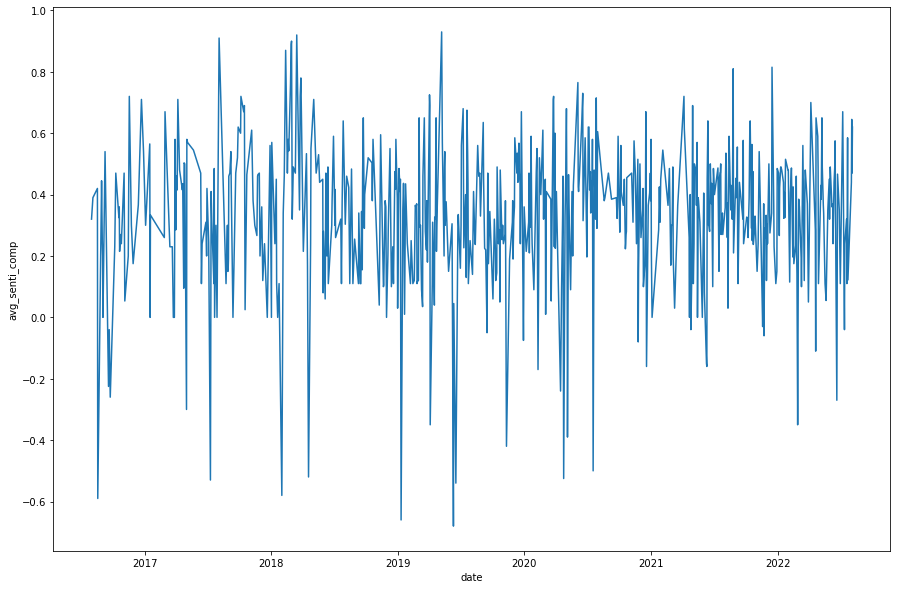

In [16]:
plt.figure(figsize=(15,10))
sns.lineplot(y='avg_senti_comp',x='date',data=df.groupby('date').mean())
# sns.lineplot(y='title_senti_comp',x='date',data=df.groupby('date').mean())
# sns.lineplot(y='news_senti_comp',x='date',data=df.groupby('date').mean())
# plt.legend()

In [23]:
df2 = df.groupby('date').mean().reset_index()

In [30]:
df2.tail()

,date,title_senti_comp,news_senti_comp,avg_senti_comp
649,2022-07-23,0.08292,0.16288,0.122
650,2022-08-02,0.00000,0.87945,0.440
651,2022-08-03,0.37095,0.91510,0.645
652,2022-08-04,0.31820,0.62490,0.470
653,2022-08-05,0.49390,0.75060,0.620


<AxesSubplot:xlabel='date'>

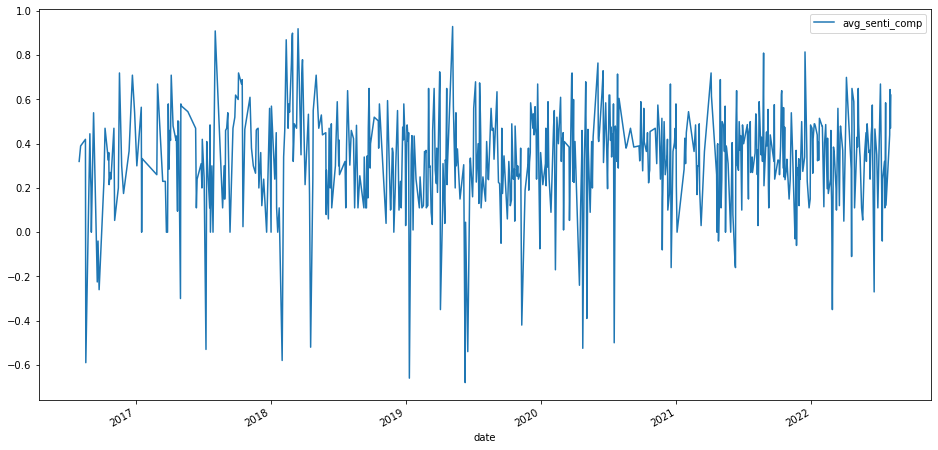

In [25]:
df2.plot(kind="line",x="date",y=["avg_senti_comp"],figsize=(16,8))

In [26]:
df2.to_csv("Reliance_sentiment.csv",index=False)

In [86]:
# df.loc[df['title_senti_comp'] !=0]['title']

In [87]:
# text1="Reliance Industries rises as its arm acquires spectrum for Rs 88,078 crore in 5G auctions"
# sentAnalyzer.polarity_scores(text1)

# disable_ops = ["tok2vec", "tagger", "parser","attribute_ruler", "ner"]
# for doc in nlp(text1):
#     ([doc.lemma_])

# text2 = " ".join(doc.lemma_ for doc in nlp(text1))

# sentAnalyzer.polarity_scores(text2)

